In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
from pandasgui import show

In [2]:
# Iniciando a Base para Migração
data = [['Salario', 11500, 'Receita','Salario Mensal Mongeral Aegon','Credito em Conta',0,0,1,'20230401','Pendente', 'Sim'],
        ['Salario', 2000, 'Receita','Dinheiro vindo da Renata','Credito em Conta',0,0,1,'20230401','Pendente', 'Sim'],
        ['Salario', 35000, 'Receita','PLR - Lucros MAG','Credito em Conta',0,0,1,'20230401','Pendente', 'Nao'],
        ['Lazer', -2000, 'Despesa','Cartao personalite - ifood e Gasolina','Cartao Personalite',0,0,1,'20230401','Pendente', 'Sim'],
        ['Alimentacao', -2500, 'Despesa','Cartão Nubank','Cartao Nubank',0,0,1,'20230401','Pendente', 'Sim'],
        ['Lazer', -1000, 'Despesa','Cartao Visa','Cartao Visa',0,0,1,'20230401','Pendente', 'Sim'],
        ['Comunicacao', -139, 'Despesa','Predial Net internet home','Boleto',0,0,1,'20230401','Pendente', 'Sim'],
        ['Comunicacao', -390, 'Despesa','Telefone Tim','Boleto',0,0,1,'20230401','Pendente', 'Sim'],
        ['Moradia', -790, 'Despesa','Condominio Spazio Noronha','Boleto',0,0,1,'20230401','Pendente', 'Sim'],
        ['Moradia', -150, 'Despesa','Gas Spazio Noronha','Boleto',0,0,1,'20230401','Pendente', 'Sim'],
        ['Lazer', -1440, 'Despesa','KLM Viagem Rennan','Cartao Personalite',1,4,5,'20230401','Pendente', 'Sim'],
        ['Presente', -328, 'Despesa','Caixa de Som Renata Pacheco','Cartao Visa',4,10,10,'20230401','Pendente', 'Sim'],
        ['Saude', -600, 'Despesa','Tratamento da Ansiedade','Cartao Visa',4,10,10,'20230401','Pendente', 'Sim'],
        ['Saude', -300, 'Despesa','Lente do óculos - 3000 10x','Cartao Visa',1,10,10,'20230401','Pendente', 'Sim'],
        ['Saude',  500, 'Receita','Reembolço Plano de Saúde previsto','Credito em Conta',0,0,10,'20230401','Pendente', 'Sim'],
        ['Poupanca',  -35000, 'Despesa','Guardar Dinheiro Poupança','Credito em Conta',0,0,10,'20230401','Pendente', 'Sim'],
        ['Poupanca',  100, 'Receita','Retorno Emprestimo Arildo','Credito em Conta',2,3,10,'20230401','Pendente', 'Sim'],
        ['Transporte', -869, 'Despesa','Eclipse Cross 2022','Boleto',9,47,3,'20230401','Pendente', 'Sim']]
        
df = pd.DataFrame(data, columns=['Grupo','Valor','Movimento','Descricao','FormaPagamento','parcela','ParcelaFinal','DiaVencimento','Competencia','Status','Recorrente'])
df['Competencia'] = pd.to_datetime(df['Competencia'], format='%Y%m%d')
df

,Grupo,Valor,Movimento,Descricao,FormaPagamento,parcela,ParcelaFinal,DiaVencimento,Competencia,Status,Recorrente
0,Salario,11500,Receita,Salario Mensal Mongeral Aegon,Credito em Conta,0,0,1,2023-04-01,Pendente,Sim
1,Salario,2000,Receita,Dinheiro vindo da Renata,Credito em Conta,0,0,1,2023-04-01,Pendente,Sim
2,Salario,35000,Receita,PLR - Lucros MAG,Credito em Conta,0,0,1,2023-04-01,Pendente,Nao
3,Lazer,-2000,Despesa,Cartao personalite - ifood e Gasolina,Cartao Personalite,0,0,1,2023-04-01,Pendente,Sim
4,Alimentacao,-2500,Despesa,Cartão Nubank,Cartao Nubank,0,0,1,2023-04-01,Pendente,Sim
5,Lazer,-1000,Despesa,Cartao Visa,Cartao Visa,0,0,1,2023-04-01,Pendente,Sim
6,Comunicacao,-139,Despesa,Predial Net internet home,Boleto,0,0,1,2023-04-01,Pendente,Sim
7,Comunicacao,-390,Despesa,Telefone Tim,Boleto,0,0,1,2023-04-01,Pendente,Sim
8,Moradia,-790,Despesa,Condominio Spazio Noronha,Boleto,0,0,1,2023-04-01,Pendente,Sim
9,Moradia,-150,Despesa,Gas Spazio Noronha,Boleto,0,0,1,2023-04-01,Pendente,Sim


In [3]:
dfmatriz = df.copy()
print("Salto Previsto para o Mes é de R$" + str(df['Valor'].sum()))


Salto Previsto para o Mes é de R$3594


In [4]:
df.to_csv("ControleFinanceiro2023_04_01.csv")

In [5]:
datafiltro = df.where(df['Descricao'] == 'Eclipse Cross 2022').dropna()
valorDivida = (int(datafiltro['ParcelaFinal']) - int(datafiltro['parcela'])) * int(datafiltro['Valor'])
print("Valor previsto da dívida do Eclipse Cross é de R$" + str(valorDivida))

Valor previsto da dívida do Eclipse Cross é de R$-33022


In [6]:
datafiltro = df.where(df['Descricao'] == 'Caixa de Som Renata Pacheco').dropna()
valorDivida = (int(datafiltro['ParcelaFinal']) - int(datafiltro['parcela'])) * int(datafiltro['Valor'])
print("Valor previsto da dívida da Caixa de Som é de R$" + str(valorDivida))

Valor previsto da dívida da Caixa de Som é de R$-1968


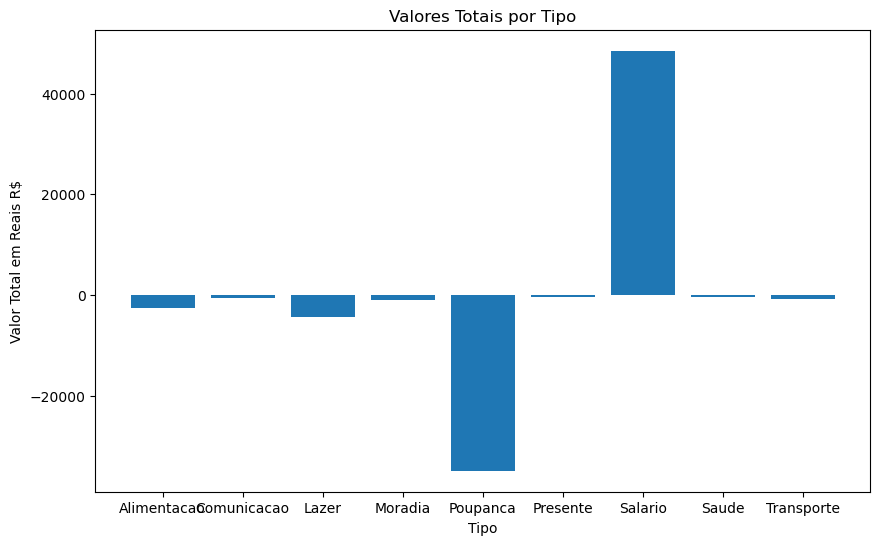

In [8]:
#Tirando a PLR
#df = df.where(df['Descricao'] != 'PLR - Lucros MAG').dropna()
df_grouped = df.groupby('Grupo').sum()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_grouped.index, df_grouped['Valor'])

# Configurações adicionais do gráfico
plt.xlabel('Tipo')
plt.ylabel('Valor Total em Reais R$')
plt.title('Valores Totais por Tipo')

# Exibe o gráfico
plt.show()

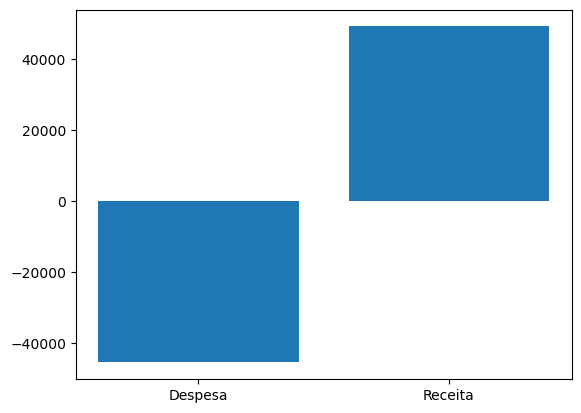

In [9]:

dfmovimento = df[['Movimento','Valor']]
df_grouped = dfmovimento.groupby('Movimento', as_index=False).sum()
plt.bar(df_grouped['Movimento'],df_grouped['Valor'])
plt.show()

In [16]:
Total = str(df_grouped.loc[1].Valor - (df_grouped.loc[0].Valor * -1))
print("Diferença entre Despesa e Receita no mes é de R$-" + Total)

Diferença entre Despesa e Receita no mes é de R$-3594


In [17]:
# Query definition
query = """ SELECT Movimento, Valor FROM dfmatriz"""
# Query execution
Despesa_SQL = sqldf(query)
Despesa_SQL

,Movimento,Valor
0,Receita,11500
1,Receita,2000
2,Receita,35000
3,Despesa,-2000
4,Despesa,-2500
5,Despesa,-1000
6,Despesa,-139
7,Despesa,-390
8,Despesa,-790
9,Despesa,-150


In [182]:
gui = show(dfmatriz)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
